In [74]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame
pd.set_option('max_columns', None)

In [9]:
df = pd.read_csv(r'C:\Users\Pablo\Documents\Projects\Data\housing.csv')
#https://www.kaggle.com/camnugent/california-housing-prices
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
df.shape

(20640, 10)

In [23]:
df.drop_duplicates().shape

(20640, 10)

[Text(0.5, 1.0, 'Value vs Income')]

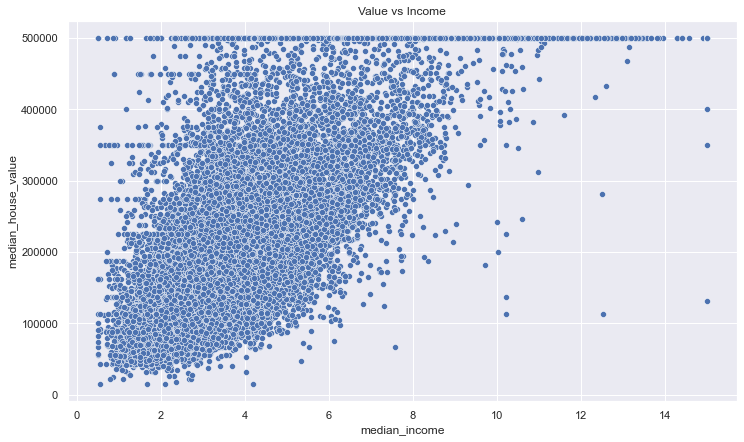

In [30]:
sns.set(rc={"figure.figsize":(12, 7)}) #width=3, #height=4
sns.scatterplot(x='median_income',y='median_house_value',data=df).set(title='Value vs Income')

[Text(0.5, 1.0, 'Value vs Income')]

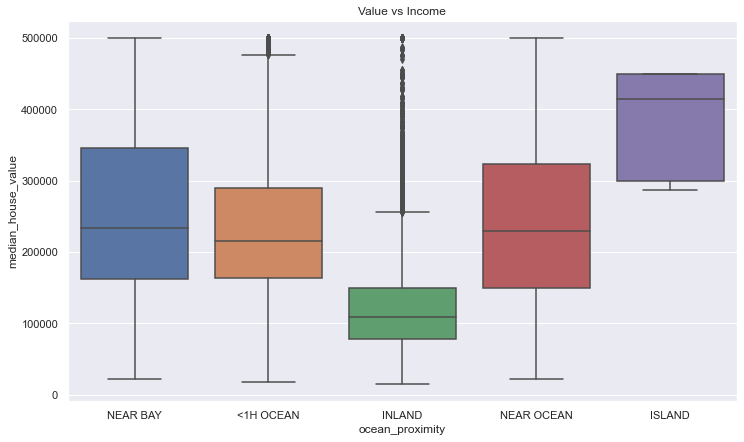

In [37]:
sns.boxplot(x='ocean_proximity',y='median_house_value',data=df).set(title='Value vs Income')

<AxesSubplot:>

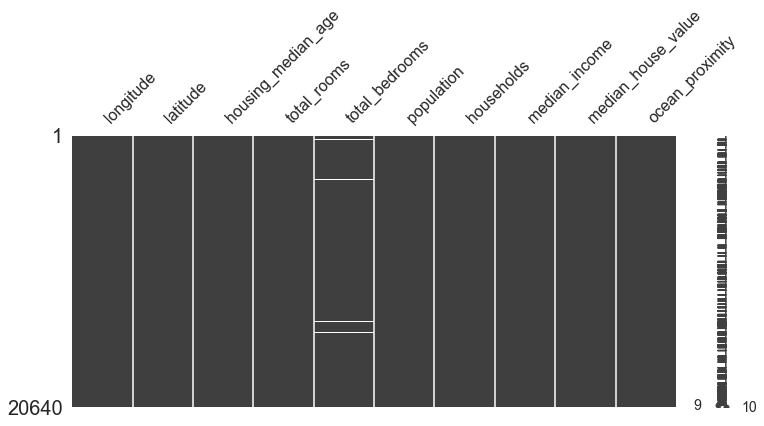

In [33]:
msno.matrix(df,figsize=(12,5))

<AxesSubplot:>

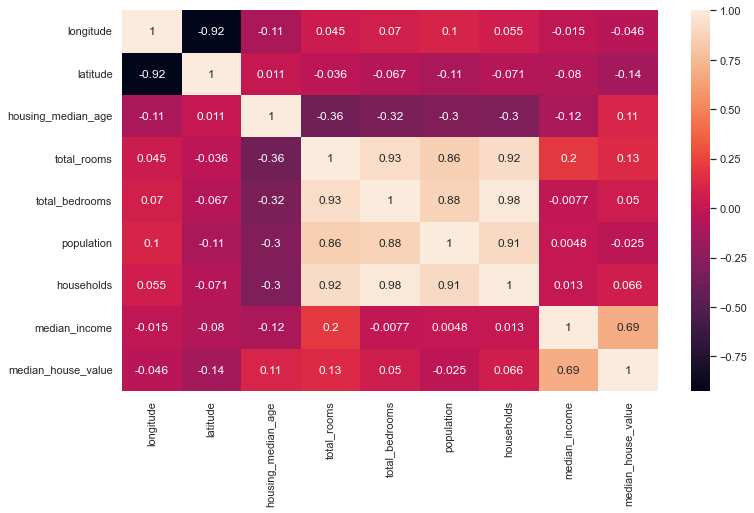

In [35]:
sns.heatmap(df.corr(),annot=True)

In [18]:
geometry = [Point(xy) for xy in zip (df['longitude'],df['latitude'])]
crs = {'init': 'epsg:4326'}

In [75]:
geo_df = gpd.GeoDataFrame(df,crs=crs,geometry= geometry)

C:\Users\Pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [76]:
geo_df = geo_df.drop(columns=['longitude','latitude'])

In [77]:
geo_df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,geometry
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,POINT (-122.23000 37.88000)
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,POINT (-122.22000 37.86000)
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,POINT (-122.24000 37.85000)
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,POINT (-122.25000 37.85000)
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,POINT (-122.25000 37.85000)


Text(17.200000000000003, 0.5, 'Latitude')

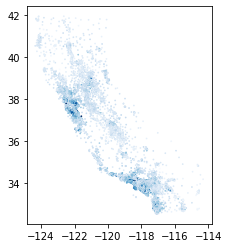

In [66]:
#fig, ax = plt.subplots(figsize=(12,7))

#geo_df.plot(ax=ax, facecolor='grey', edgecolor='black',alpha=1,linewidth=1,cmap="Purples",)
#geo_df.plot("median_house_value", cmap="Purples",markersize=.5)
geo_df.plot("median_income", cmap="Blues",markersize=.5,scale='median_income')

fig.suptitle('California Homes', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')